    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

In [14]:
from sklearn.datasets import fetch_california_housing


# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
# import california housing dataset  and convert the data into dataframe

california = fetch_california_housing()
import pandas as pd


df = pd.DataFrame(california.data,
                             columns=california.feature_names)

df['MedHouseValue'] = pd.Series(california.target)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
#Check for missing values.
df[pd.isnull(df).any(axis=1)]
#There are no missing values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue


<Axes: title={'center': 'Pearson Correlation Matrix'}>

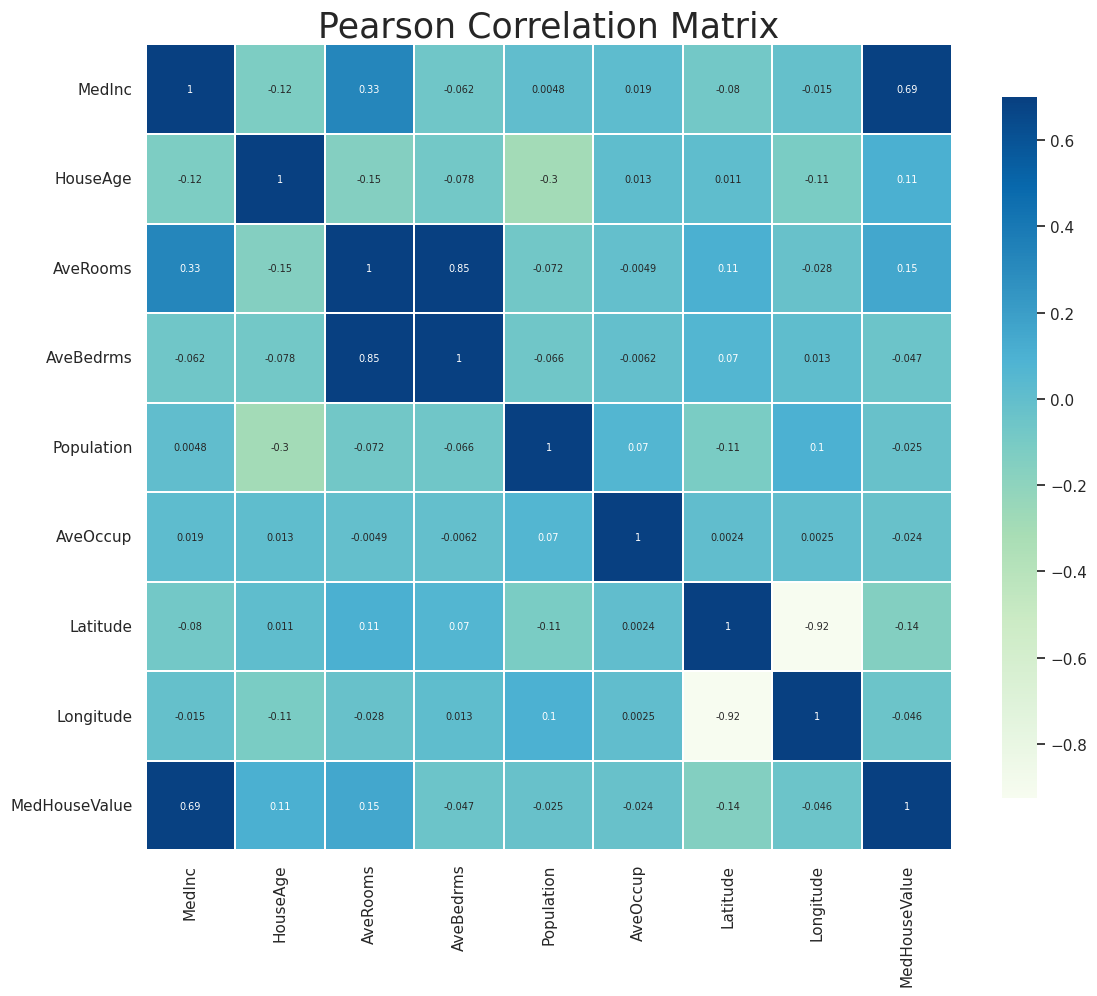

In [17]:
# Check Correlation matrix.

sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})



In [18]:
#Show in descendent order correlation for the attributes from de dataset and the target parameter
price_corr = df.corr()['MedHouseValue'].sort_values(ascending=False)
print(price_corr)


MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=df, x=feature,y='MedHouseValue',
                    hue='MedHouseValue', palette='cool', legend=False)

In [112]:

#Splitting data into training and testing subsets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(california.data,
                                                    california.target, random_state=11)
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [103]:
# features trasansformation by scaling each feature to a given range
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  78.6552650055691
Min:  -26.04187082394279


In [104]:
# training the model

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i,name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: -0.3162810106153916
  HouseAge: -0.005820789478268459
  AveRooms: 0.5318468073238539
 AveBedrms: 0.23246023848654054
Population: 0.074203749729176
  AveOccup: -0.49549176065144146
  Latitude: -0.3491177066302901
 Longitude: 0.011570739034994865


In [105]:
# Predicting data

predicted = linear_regression.predict(X_test)
rounded = [np.round(x,3) for x in predicted]
expected = y_test


In [113]:
# Checking the model performance

print('MAE: ',mean_absolute_error(y_test,rounded))
print('MSE: ',mean_squared_error(y_test,rounded))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,rounded)))
print('Variance Regression Score: ',explained_variance_score(y_test,rounded))

MAE:  0.5378925290697674
MSE:  0.5350165907023449
RMSE:  0.7314482829991091
Variance Regression Score:  0.6011680097765574


[0.762 1.732 1.125 ... 0.7   0.866 0.508]
[1.25396876 2.34693107 2.03794745 ... 1.41376537 1.26616891 1.86492088]


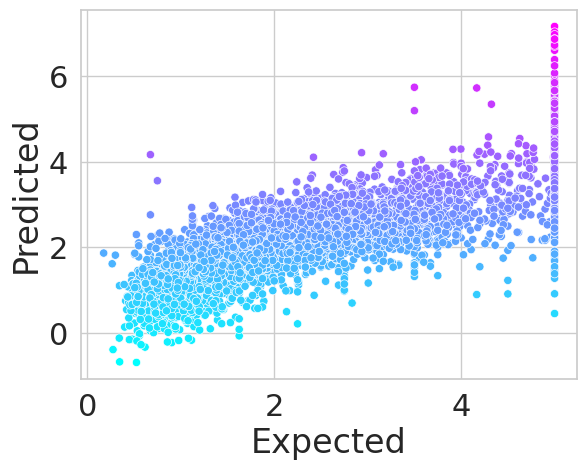

In [107]:
#Plotting dispersion for the real and predicted values

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(rounded)
print(expected)
print(predicted)
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

In [108]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

print(f'X-limit {axes.set_xlim(start, end)}')
print(f'Y-limit {axes.set_ylim(start, end)}')

X-limit (-0.6830978604145694, 7.155719818496708)
Y-limit (-0.6830978604145694, 7.155719818496708)


In [109]:
#Defining the ANN model using and setting parameters

model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
# training the model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

In [76]:
#Using the trained model to predict values

predictions = model.predict(X_test)




162/162 [==============================] - 0s 2ms/step


In [77]:
# Checking the model performance

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

MAE:  0.37136586375727026
MSE:  0.2830617028156387
RMSE:  0.5320354337970721
Variance Regression Score:  0.7903117312703659


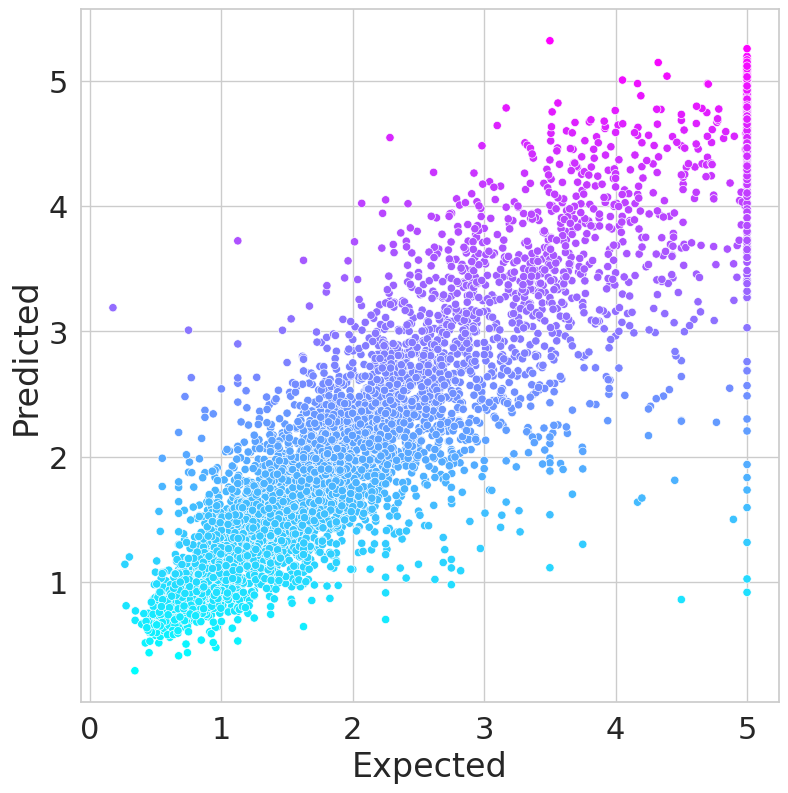

In [73]:
#Plotting dispersion for the real and predicted values

df = pd.DataFrame()
df['Expected'] = pd.Series(y_test)

df['Predicted'] = pd.Series(predictions.flatten())

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

In [82]:
#choosing the best model
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=california.data, y=california.target, cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')


LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
